In [10]:
import time

import matplotlib.pyplot as plt
import matplotlib as mpl
import mnist
import numpy as np

import utils

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

    return

# Load Data

In [12]:
# import UMAP output
labels = np.loadtxt("labels-training-60k.txt", dtype=int)
data = np.loadtxt("out-training-60k.tsv", dtype=float)

# Parse MNIST data
mlabels, images = [], []
for label, img in mnist.read(dataset="training", path="mnist_database"):
    mlabels.append(label)
    images.append(img)
    
assert len(labels) == len(mlabels)
for l1, l2 in zip(labels, mlabels):
    assert l1 == l2

# Scatter plot of UMAP projection

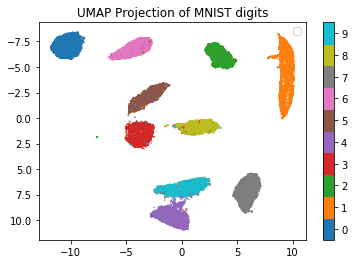

In [13]:
# plot
fig, ax = plt.subplots()
x = data[:,0]
y = data[:,1]
colors = labels

plt.scatter(x, y, s=0.2, c=labels, cmap="tab10")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

ax.legend()
ax.set_title("UMAP Projection of MNIST digits")
ax.invert_yaxis()

plt.show()


fig.savefig("plot-UMAP_mapping.png", dpi=300)

# Plot with handwritten digits

Time: 325.26 secs


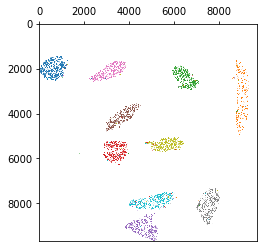

In [15]:
reload(utils)
reload(mnist)

# User parameters
grayscale = False
density = 0.5
num_digits = 60000


if grayscale:
    colors = None
    cmap = mpl.cm.Greys
    out_fp = "plot-UMAP_digits.png"
else:
    colors = [np.array(c) for c in mpl.cm.tab10.colors]
    cmap = mpl.cm.tab10
    out_fp = "plot-UMAP_digits_color.png"

# Build the image data
start_time = time.time()
canvas = utils.build_digit_image_data(images[:num_digits], data[:num_digits], labels[:num_digits], density=density, colors=colors)
dt = time.time() - start_time
print("Time: %2.2f secs" % dt)

    
# Display image data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
imgplot = ax.imshow(canvas, cmap=cmap, origin="upper")
imgplot.set_interpolation('nearest')
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')

plt.show()

fig.savefig(out_fp, dpi=2000, bbox_inches="tight")